In [1]:
import pprint
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from utils.neuron import Neuron
from utils.layer import Layer
from utils.neuralNet import Network
import collections
from collections import defaultdict
import heapq

In [2]:
input_neuron = Neuron(1.22)
n1 = Neuron(input_neuron.input)
n2 = Neuron(input_neuron.input)

In [3]:
n1.get_state()

0

In [4]:
n1.feed_forward(input_neuron.signal)
n2.feed_forward(input_neuron.signal)

In [5]:
n1.signal

array([1.29920621, 0.93573044, 1.        ])

In [6]:
print(input_neuron.get_state())
print(n1.get_state())
print(n2.get_state())

0
0.9357304417873599
0.7521495583374088


In [7]:
print('')
pprint.pprint(n1.get_weights())
print('')
pprint.pprint(n2.get_weights())


array([[0.50868219, 0.71957434],
       [0.06721434, 0.0103511 ],
       [0.65940966, 0.05489226]])

array([[0.27534622, 0.16751794],
       [0.13281207, 0.13012245],
       [0.39717577, 0.51059948]])


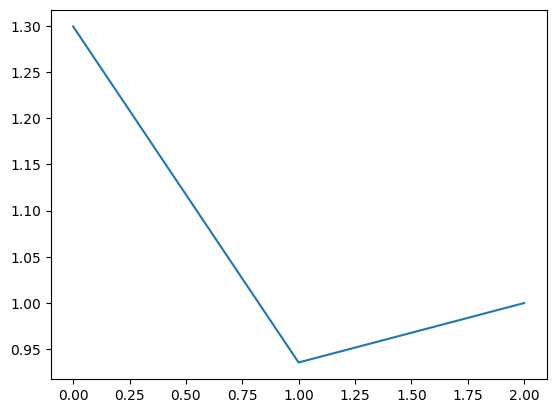

In [8]:
plt.plot(n1.signal)

In [9]:
transducer = Neuron(1.78293)
layer_1 = Layer(12)
layer_1.forward(transducer)
print(layer_1)

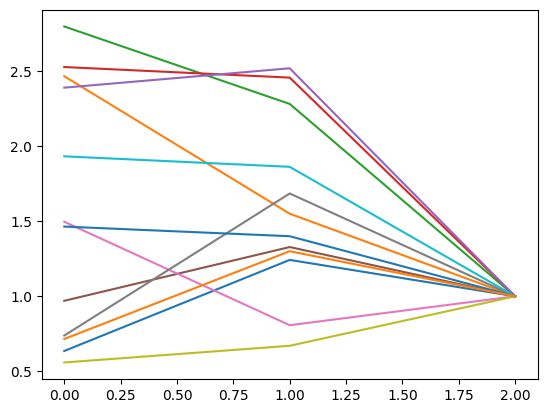

In [10]:
for n in layer_1.neurons:
    plt.plot(n.signal)

In [11]:
l2 = Layer(64)
l2.forward(n1.signal)

In [23]:

for n in l2.neurons:
    t = []
    for i in n:
        if i != 1:
            t.append(i)
    plt.plot(t)

TypeError: 'Neuron' object is not iterable

In [13]:
import networkx as nx

In [14]:
layer_1.neurons

array([<utils.neuron.Neuron object at 0x7fb0d27a3d90>,
       <utils.neuron.Neuron object at 0x7fb0d27c9c60>], dtype=object)

In [15]:
g = nx.MultiGraph()
edge_dict = defaultdict()

for idx, n in enumerate(layer_1.neurons):
    g.add_node(n)
    edge_dict[idx] = (n, n.edges_delta(5, l2))
print(edge_dict)

defaultdict(None, {0: (<utils.neuron.Neuron object at 0x7fb0d27a3d90>, [(0.09209081841251432, <utils.neuron.Neuron object at 0x7fb0d307e8f0>), (0.035348567101982864, <utils.neuron.Neuron object at 0x7fb0d307e620>), (0.18501387759050592, <utils.neuron.Neuron object at 0x7fb0d307eb90>), (0.43361379048480986, <utils.neuron.Neuron object at 0x7fb0d307ebc0>), (0.016883078738273882, <utils.neuron.Neuron object at 0x7fb0d307e980>), (0.2474579529034977, <utils.neuron.Neuron object at 0x7fb0d307ecb0>), (0.1269604763624419, <utils.neuron.Neuron object at 0x7fb0d307ece0>), (0.10420888191636546, <utils.neuron.Neuron object at 0x7fb0d307ed10>), (0.4212766233897045, <utils.neuron.Neuron object at 0x7fb0d307ee90>), (0.046622729942456975, <utils.neuron.Neuron object at 0x7fb0d307efb0>), (0.45775875816434475, <utils.neuron.Neuron object at 0x7fb0d307efe0>), (0.1156756256558873, <utils.neuron.Neuron object at 0x7fb0d307f130>), (0.20158009570294788, <utils.neuron.Neuron object at 0x7fb0d307f250>), (0.323

In [16]:
h = edge_dict[1][1]
print(len(h))

16


In [17]:
signal = Neuron(1.7892)
l1 = Layer(64)
l2 = Layer(64)
l1.forward(signal.input)
l2.forward(signal.input)
nn = Network([l1, l2])
nn.int_graph()

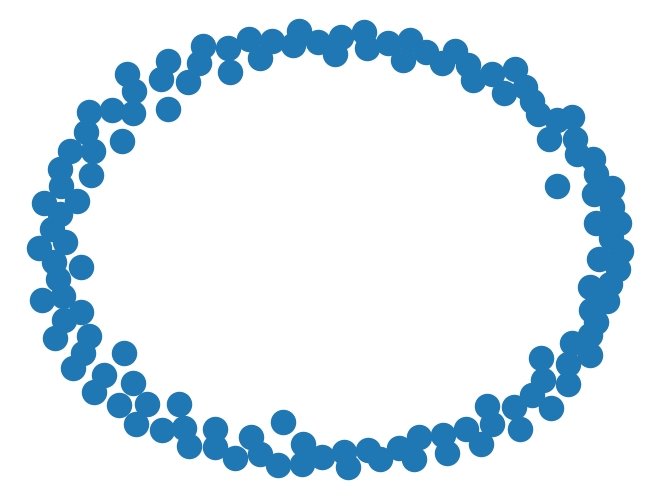

In [18]:
nx.draw(nn.graph)

In [19]:
nn.edge_dict

defaultdict(None, {})

In [20]:
nn.layers_cycle()

In [22]:
nn.edge_dict

defaultdict(None,
            {0: [(0.08825313880048635,
               <utils.neuron.Neuron at 0x7fb0d307f640>),
              (0.13150121318885222, <utils.neuron.Neuron at 0x7fb0d33d4c10>),
              (0.251331670666193, <utils.neuron.Neuron at 0x7fb0d33d4c70>),
              (0.2196079787966856, <utils.neuron.Neuron at 0x7fb0d33d4d00>),
              (0.34939772334667296, <utils.neuron.Neuron at 0x7fb0d33d4d30>),
              (0.29545347120565335, <utils.neuron.Neuron at 0x7fb0d33d4d60>),
              (0.15546679598293633, <utils.neuron.Neuron at 0x7fb0d33d4df0>),
              (0.07698082411845708, <utils.neuron.Neuron at 0x7fb0d33d4e20>),
              (0.08296005505881965, <utils.neuron.Neuron at 0x7fb0d33d4e50>),
              (0.33895376533909816, <utils.neuron.Neuron at 0x7fb0d33d4eb0>),
              (0.11878408599646284, <utils.neuron.Neuron at 0x7fb0d33d4f10>),
              (0.4912426020081988, <utils.neuron.Neuron at 0x7fb0d33d4fa0>),
              (0.085289233595551

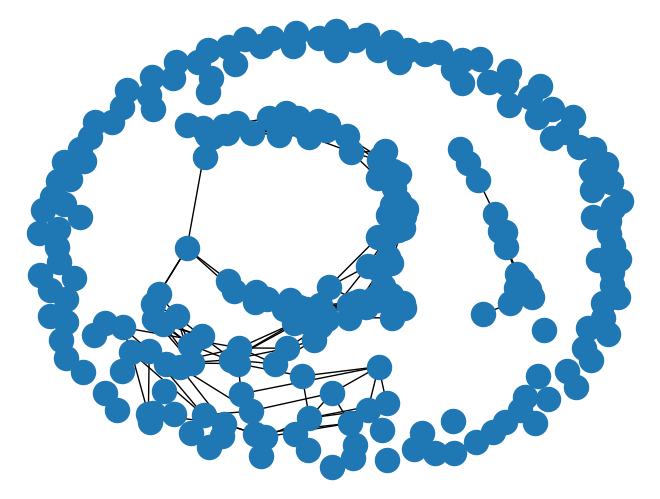

In [21]:
nx.draw(nn.graph)